In [2]:
import os 
import glob 
import cv2 
import torch 
import random 
import numpy as np 
import matplotlib.pyplot as plt 


In [3]:
from model import VAE 

In [ ]:
model_checkpoint = "/home/mojo/dev/world-models-pytorch/VAE/exps/2023-07-01_bs_64_epochs_50_latentsize_64/weights/best.pth"

In [44]:
data_dir = "/home/mojo/dev/world-models-pytorch/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [50]:
model = VAE(latent_size=64, in_channels=3)
model = model.to(device)

In [ ]:
model.load_state_dict(torch.load(model_checkpoint))
model.eval()

In [58]:
files = glob.glob(data_dir + "/**/*.npz", recursive=True)
len(files)

10020

In [59]:
samples = random.sample(files, 10)

'/home/mojo/dev/world-models-pytorch/data/vae/thread_9/rollout_419.npz'

In [60]:
for sample in samples:
    with np.load(sample) as data_sample: 
        data = {k: np.copy(v) for k, v in data_sample.items()} 
    idx = random.randint(0, 999) 
    img = data['observations'][idx]
    img = cv2.resize(img, (64, 64))
    img_org = img.copy()
    img = torch.tensor(img).float() / 255. 
    img = img.unsqueeze(0)
    img = img.transpose(1, 3)
    img = img.to(device)
    
    with torch.no_grad():
        pred = model(img)

    reconst = pred[0].transpose(1,3).squeeze(0).cpu().numpy()
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(img_org)
    axs[0].set_title("Original Image")
    axs[0].axis("off")
    axs[1].imshow(reconst)
    axs[1].set_title("Reconstruction")
    axs[1].axis("off")
    plt.show()

In [61]:
with np.load(files[120]) as data: 
    data_file = {k: np.copy(v) for k, v in data.items()}


dict_keys(['observations', 'rewards', 'actions', 'terminals'])

(1000,)

In [71]:
pred[0].shape

torch.Size([1, 3, 64, 64])

In [72]:
pred[1].shape

torch.Size([1, 64])

In [73]:
reconst = pred[0].transpose(1,3).squeeze(0).cpu().numpy()
reconst.shape

(64, 64, 3)

In [74]:
np.min(reconst)

9.7628266e-33

In [75]:
np.max(reconst)

0.92999697

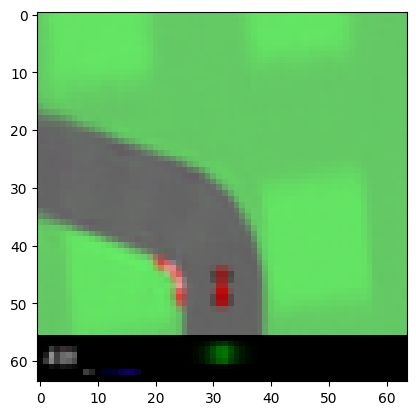

In [76]:
plt.imshow(reconst)